# CALIFORNIA HOUSING PROJECT
# Analysis and Modeling

This project involves analyzing housing data from the state of California and building predictive models to estimate housing prices based on various features such as location, housing characteristics, and socioeconomic factors. Its goal is to gain insights into the factors influencing housing prices and develop accurate models that can help stakeholders, such as real estate agents, buyers, and sellers, make informed decisions.

For this project, separating analysis and machine learning modeling into different documents could be beneficial, especially because both the analysis and modeling processes involve multiple steps, and by separating each part into its own document can help maintain clarity and focus.

# Part 1: ***Analyzing the dataset***

With a good analysis we can derive meaningful insights and develop accurate models to understand and predict housing prices in California.
In this part, we will explore the dataset to understand its structure, distributions, and relationships between variables. Using descriptive statistics, visualizations (like histograms, box plots or scatterplots), and correlation matrices we will uncover patterns, trends, and potential insights. Identifying outliers and anomalies, and creating new features or transform existing ones to enhance the predictive power of the models are also important parts of this process.

Let us start by importing the necessary libraries for data analysis, as well as the dataset itself.

In [1]:
# Importing the necessary libraries for analytics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing file
df_housingCali = pd.read_csv("housing.csv")
df_housingCali

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


The dataset contains 14 features (columns) related to housing attributes. The target variable for analysis (and later for modeling) appears to be 'median_house_value', representing the **Median House Value** for households within a block (measured in US Dollars), for each instance of the dataset corresponds to a distinct geographical block within California.

# **Data Cleaning**
Also called data wrangling, is the process of identifying and correcting errors, inconsistencies, and missing values in a dataset to ensure its quality and reliability for analysis.

This process involves handling missing values, encoding categorical variables, scaling numerical features, and performing basic data quality checks, ensuring the data is in a suitable format for further exploration.

In [3]:
# Dealing with Null values / missing values
pd.isnull(df_housingCali).sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


We only have null values in the 'total_bedrooms' column.

The amount of missing values is relatively small when compared to the total size of the dataset. Removing a couple hundred instances out of a couple ten thousand of rows should not pose a significant problem on the analysis and modeling tasks.

In [4]:
df_housingCali.dropna(inplace = True)  # dropping N/A instances (149 instances have null values)
df_housingCali.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


It could be important to visualize the distributions of the numerical variables and identify any patterns or anomalies.
This will help us know which steps to take from there in terms of EDA or Feature Engineering.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

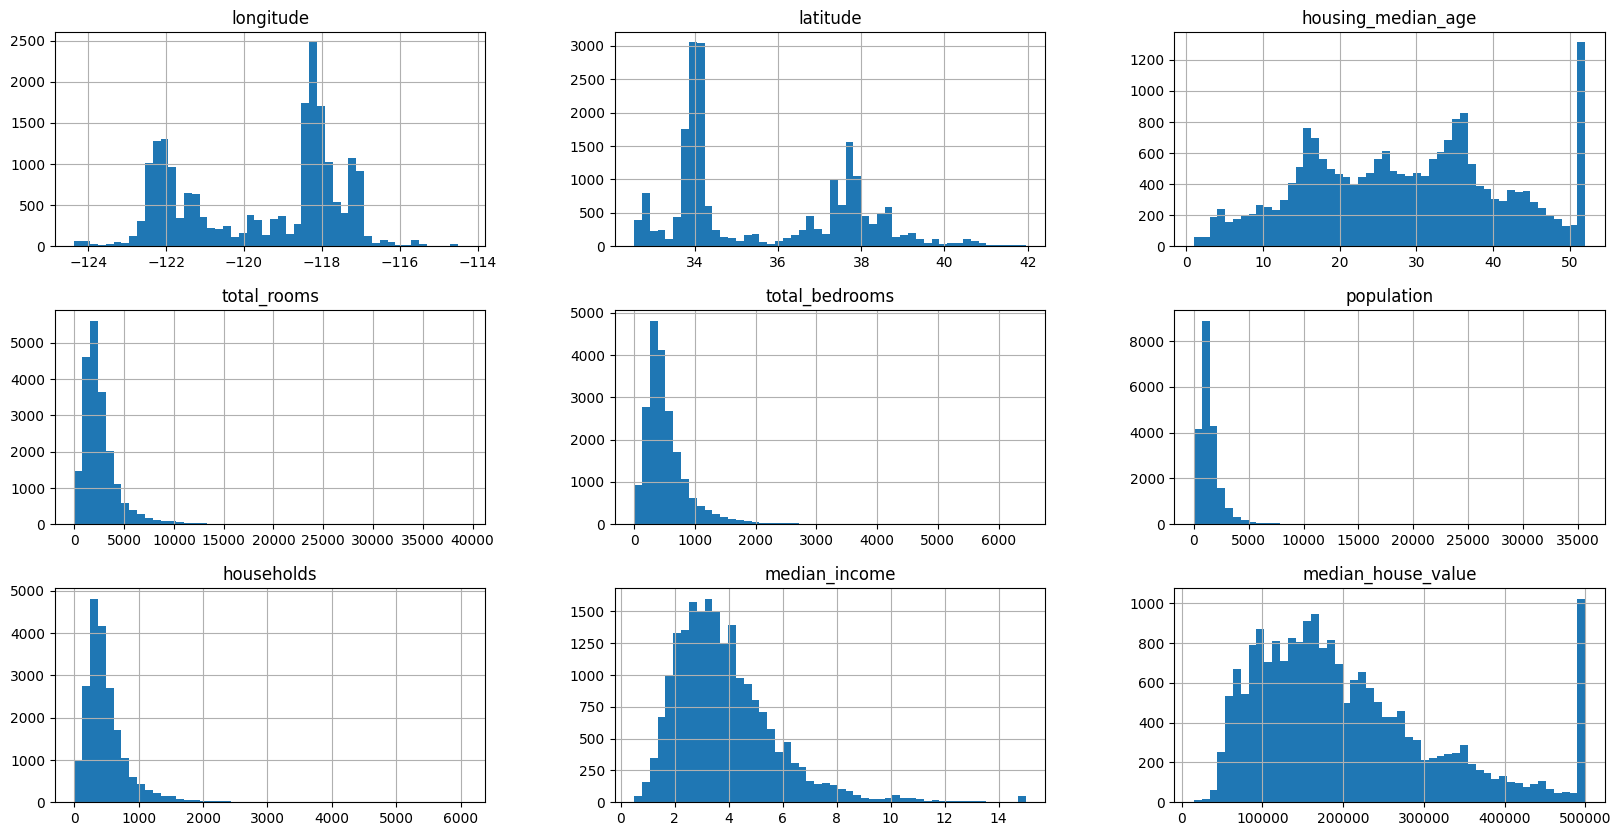

In [5]:
# Displaying historams from all numeric variable, to understand their distributions
df_housingCali.hist(bins = 50, figsize = (20, 10))

As we can see, some of the features, like **Population** or **Households**, are skewed (right skewed, with tail to the right) instead of "nice bell curves" like we get in Gaussian distributions, which indicates that the distribution of those features is not symmetrical. This is important to notice because the skewness of our data can affect the performance of certain statistical models.

Skewed distributions can occur for various reasons, including:

- **Outliers**: Extreme values in the data can skew the distribution by pulling the mean in the direction of the outlier.
- **Natural asymmetry**: Some features may naturally have asymmetric distributions due to the nature of the data they represent.
- **Sampling Bias**: Skewness can arise from sampling bias, where the sample data is not representative of the population. If the sample is not properly randomized or if certain subgroups are overrepresented or underrepresented, it can lead to skewed distributions.

We will come back to this matter later.

# Correlation Matrix
"median_house_value" is supposed to be our target. So, let us make a correlation matrix, so that we may find which features have a stronger relationship with our target. We may want to explore these relationships further and consider them when building your predictive model for house value.

In [6]:
df_housingCali.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In order to include 'ocean_proximity', we need a numerical representation of its text data.

In [7]:
# 'ocean_proximity' is of type string. We need to deal with this issue separately
df_housingCali['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


So, we only have 5 categories in the 'ocean_proximity' feature. We could quickly map each of them to a number, creating a corresponding numerical column.
It could be tempting to map the 5 ascendingly (for instance, the further from the ocean, the higher the mapping number). This way, we could infer some conclusions about the house prices as the distance from the ocean grows or decreases, if the correlation is strong enough.
Although it could work well in some situations, this method creates an ordinal relationship between the categories, where the numerical values imply a ranking that may not really exist or be significant enough to be considered, introducing then some bias. The correlation results would consider this ordinal relationship, which could not accurately represent the true relationship between **Ocean Proximity** and **House Value**.

In contrast, **One-Hot Encoding** is a technique that treats each of the 5 categories as a separate binary variable, without assuming any ordinal relationship between the categories. This approach allows for a more flexible and unbiased analysis of the relationship between each category and median house value.



In [8]:
# Turning 'ocean_proximity' into binary categories using One-Hot Encoding
# Performing One-Hot Encoding for 'ocean_proximity'
df_housingCali_OPEncoded = pd.get_dummies(df_housingCali['ocean_proximity'])

# Concatenating the One-Hot Encoded columns with the original DataFrame
df_housingCali_OPNumeric = df_housingCali.join(df_housingCali_OPEncoded)

# Dropping the original 'ocean_proximity' column
df_housingCali_OPNumeric.drop('ocean_proximity', axis = 1, inplace = True)

df_housingCali_OPNumeric

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


In [9]:
# Making a correlation matrix (boolean values may be included along with numerical values, as 1s and 0s)
corr_matrix = df_housingCali_OPNumeric.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


<Axes: >

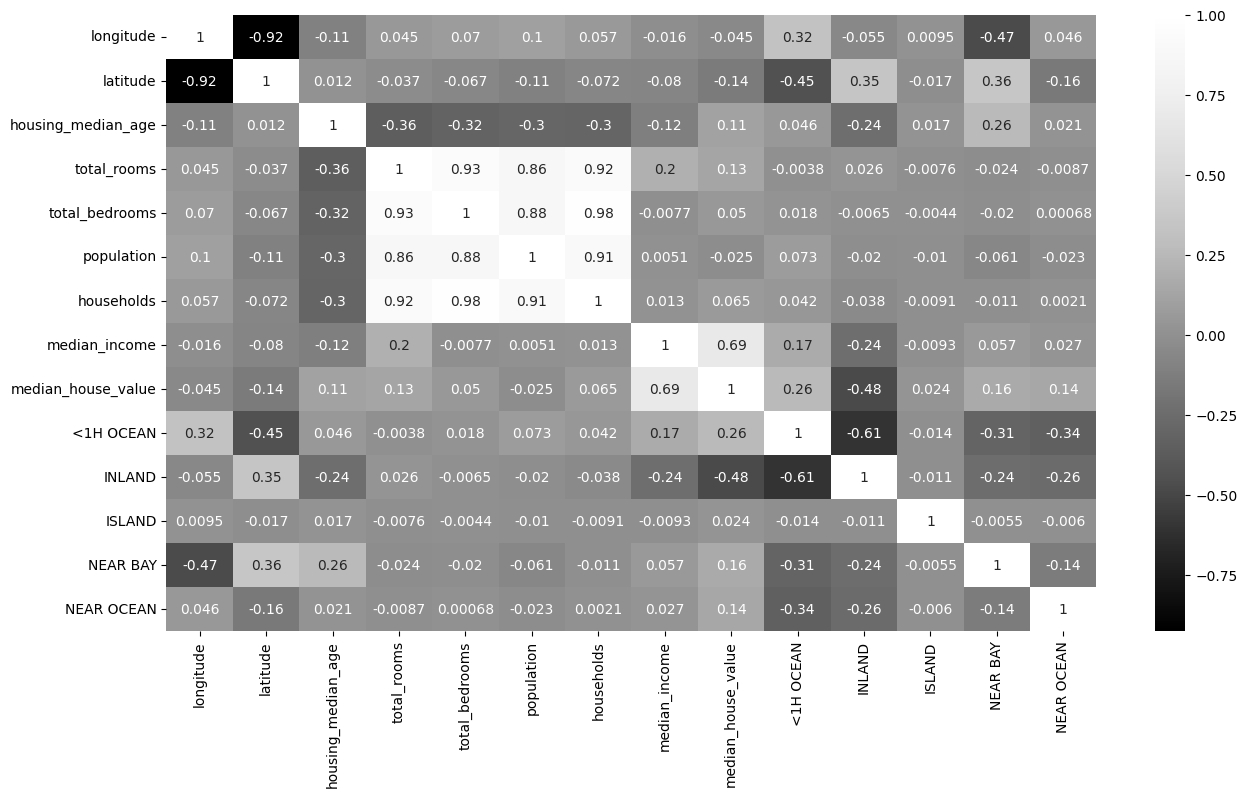

In [10]:
# Visualing the matrix as a heatmap (from Seaborn)
plt.figure(figsize = (15,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'Greys_r')

# Some important correlations and possible insights
When considering correlations related to house prices (median_house_value), it's essential to focus on the correlations that are relatively strong (closer to 1 or -1) and also make logical sense based on intuition or prior knowledge of the housing market.

So, the correlations that appear to be important to analyze and more significant regarding median house prices are:

- **Median Income** (0.688355): This correlation indicates a moderately strong positive relationship between median income and median house values. It suggests that areas with higher median incomes tend to have higher median house values. Intuitively, this relationship makes sense because families with higher incomes typically have more purchasing power and can afford more expensive housing options;

- **Ocean Proximity**:


  1.   **Inland** (-0.484787): This correlation shows a moderately strong negative relationship between being inland (far from the ocean) and their house values. It implies that areas located inland tend to have lower median house values. The negative correlation suggests that distance from the coast is a significant factor influencing house prices, with inland areas generally being less desirable in terms of housing value;

  2.   **<1h Ocean** (0.257614): At most, we may say that this correlation indicates a moderately positive relationship between the proximity to the ocean and median house values. It suggests that areas closer to the ocean tend to have higher median house values. However, the correlation is under 30%, indicating that while ocean proximity may be a factor, other variables also contribute to variations in house prices.

  The other correlations between Ocean Proximity categories and house values are weak (all of them around 16% or less);


- **Latitude** (-0.144638): Although not very strong, this negative correlation suggests a relationship between latitude and median house values. Specifically, it indicates that areas located further north (higher latitude values) tend to have slightly lower median house values. While this relationship may be influenced by various factors such as climate, desirability of location, or availability of amenities, further analysis is needed to understand the underlying reasons for this correlation (especially because the correlation is under 15%, and thus could be considered weak);


- **Total Rooms** (0.133294): This correlation indicates a weak positive relationship between the total number of rooms in a housing block and the median house values. It suggests that there is a slight tendency for houses with more rooms to have higher values, although the correlation is below 15%.


- **Housing Median Age** (0.106432): There is a positive correlation between housing median age and median house value. This suggests that areas with older housing stock tend to have slightly higher median house values. Although the correlation is also weak, it could be interesting to notice that this relationship may be influenced by factors such as historical significance, architectural styles, or desirability of mature neighborhoods.


**Median Income** and **Ocean Proximity** (mainly two of its categories) seem to be the features that more significantly provide insights into the factors that influence house prices, from the dataset.
These correlations stand out as they have relatively higher absolute correlation coefficients compared to other variables in the dataset. They provide valuable insights into the factors influencing median house prices in the analyzed dataset. However, it's important to note that correlation does not imply causation.



# Data Processing

We have already seen that we have some skewed distributions in some features of our dataset.
Overall, understanding the reasons behind skewed distributions is crucial for effective data analysis and modeling. It enables analysts to address potential issues, choose appropriate preprocessing techniques, ensure the validity of statistical assumptions, improve model performance, and enhance the interpretability of their results.

Understanding the reasons behind skewed distributions is important for several reasons in the context of data analysis and modeling:

- **Identifying Data Quality Issues**: Skewed distributions may indicate potential data quality issues, such as outliers, errors, or biases in the data collection process. By understanding the underlying causes of skewness, analysts can identify and address these issues to ensure the reliability and integrity of the dataset.

- **Selecting Appropriate Preprocessing Techniques**: Different sources of skewness may require different preprocessing techniques to address them effectively. For example, outliers may need to be identified and treated separately, while natural asymmetry in the data may be addressed through transformation methods. Understanding the root causes of skewness helps analysts choose the most appropriate preprocessing techniques for their specific dataset.

- **Ensuring Assumptions of Statistical Methods**: Many statistical methods and models assume that the data are normally distributed or approximately symmetric. Skewed distributions violate these assumptions, which can lead to biased estimates or inaccurate inferences if not properly addressed. By identifying and mitigating skewness, analysts can ensure that their data meets the assumptions of the chosen statistical methods, thereby improving the validity and reliability of their analyses.

- **Improving Model Performance**: Skewed distributions can impact the performance of predictive models and machine learning algorithms. Models trained on skewed data may exhibit suboptimal performance, such as poor generalization or prediction accuracy. By preprocessing the data to reduce skewness, analysts can improve the performance of their models and enhance their ability to make accurate predictions.

- **Enhancing Interpretability**: Skewed distributions may obscure patterns or relationships in the data, making it difficult to interpret the results of analyses or draw meaningful conclusions. By transforming skewed data into a more symmetric form, analysts can enhance the interpretability of their findings and gain deeper insights into the underlying processes or phenomena being studied.


Visualizing the distributions of the data using the histograms is sufficient to perceive their skewness. However, determining whether skewness in a distribution is due to **outliers** or **genuine asymmetry** in the data requires more careful examination and analysis.

**Box plots** provide a more reliable way to visually identify potential outliers in a dataset.

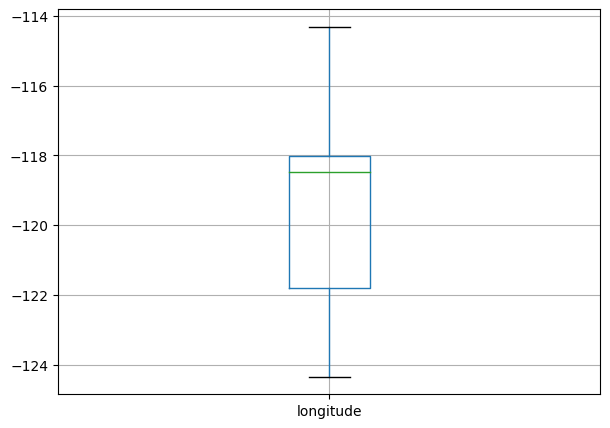

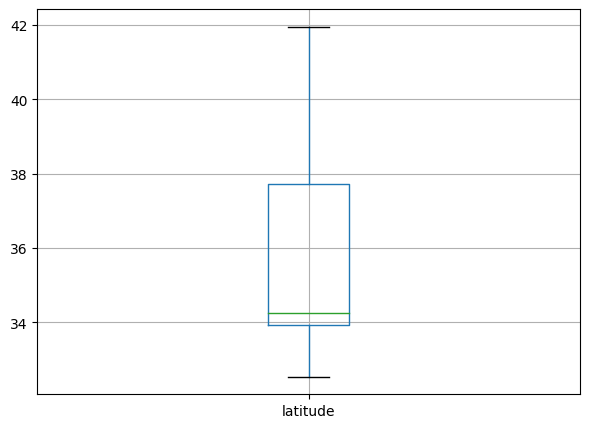

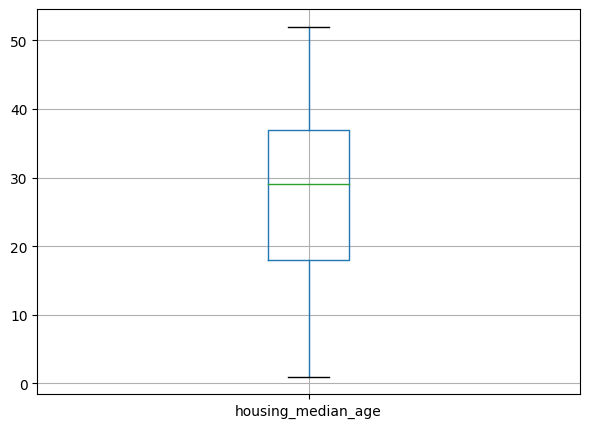

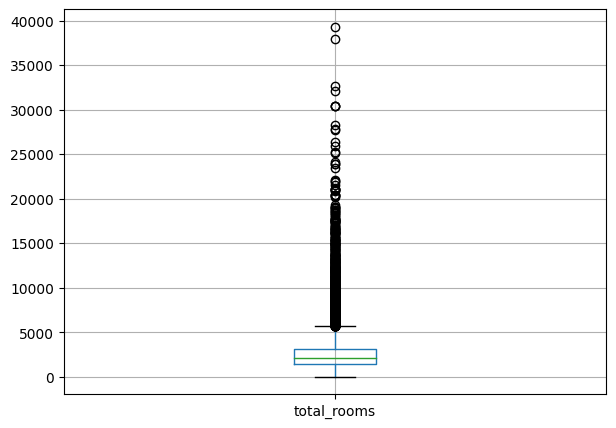

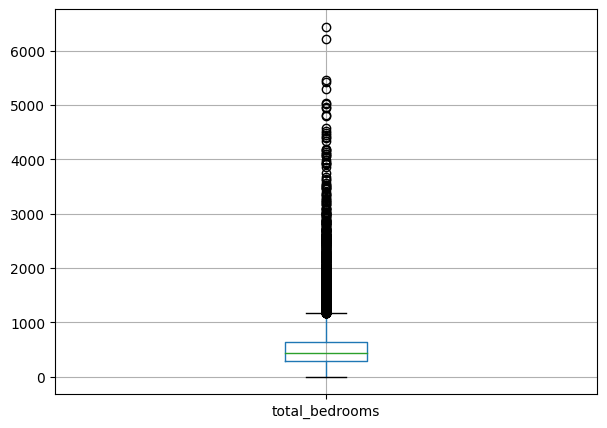

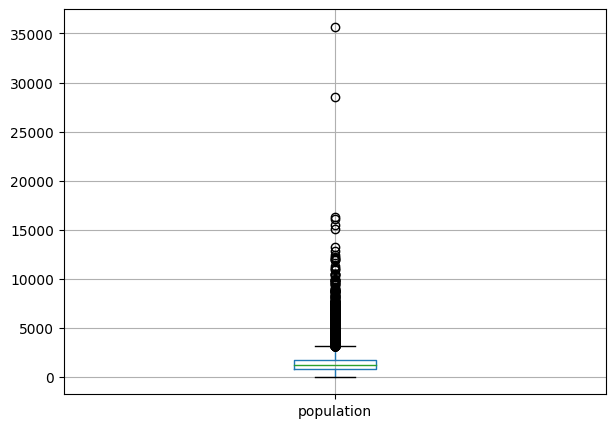

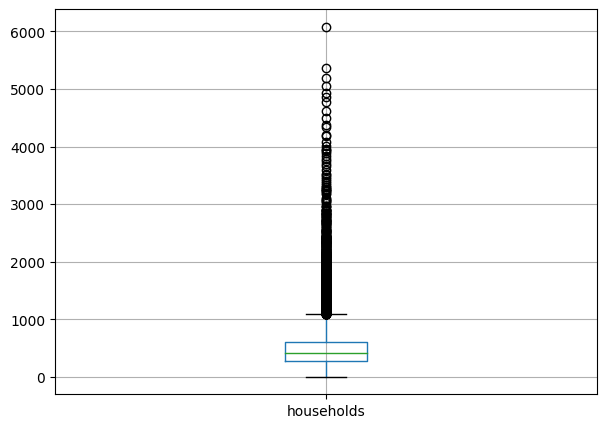

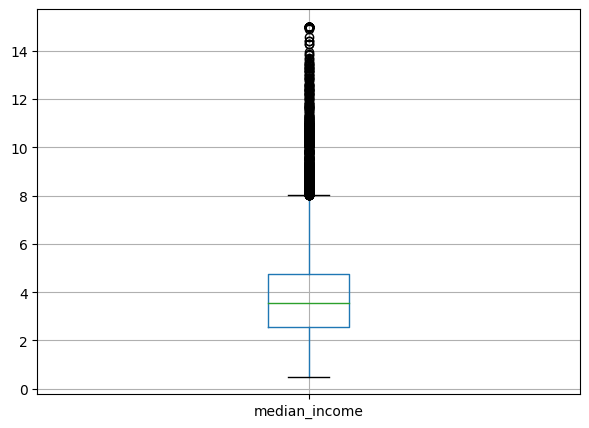

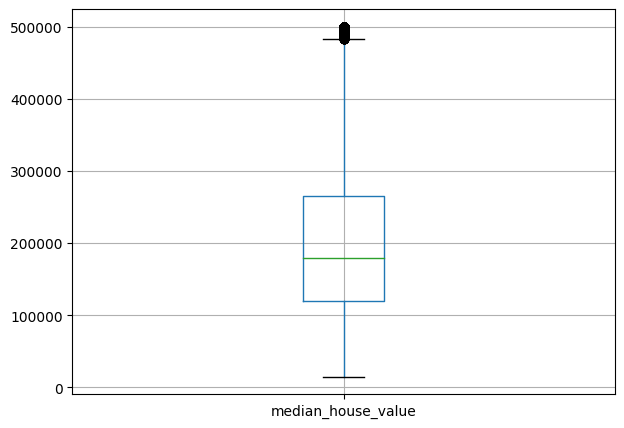

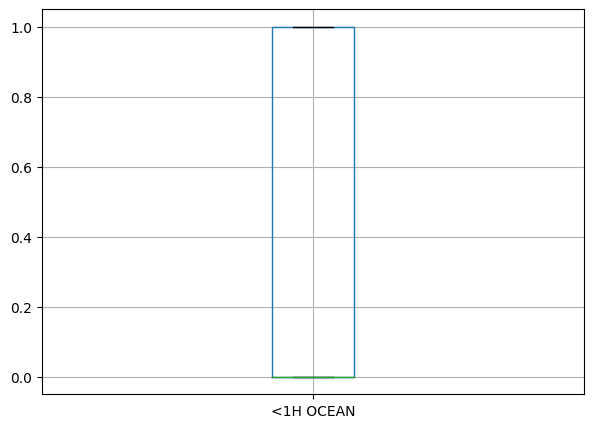

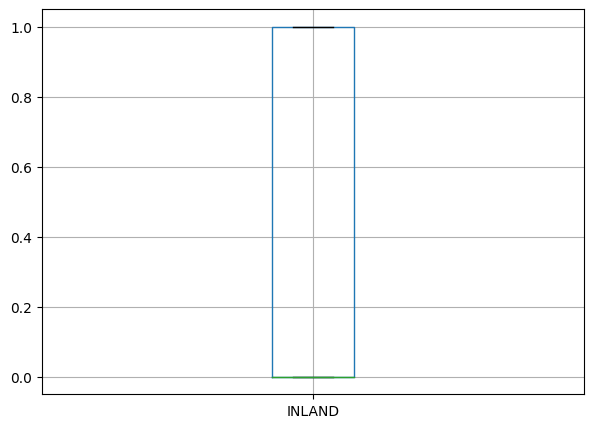

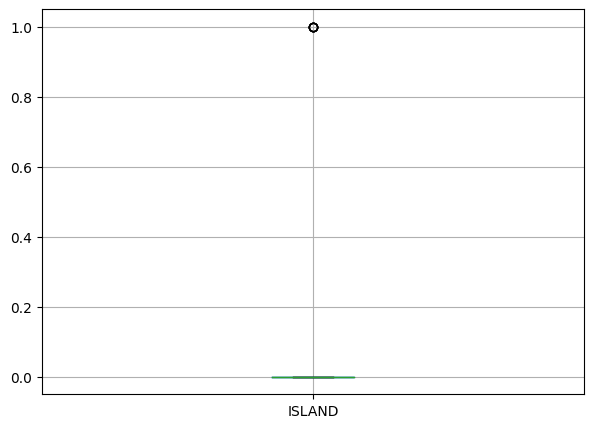

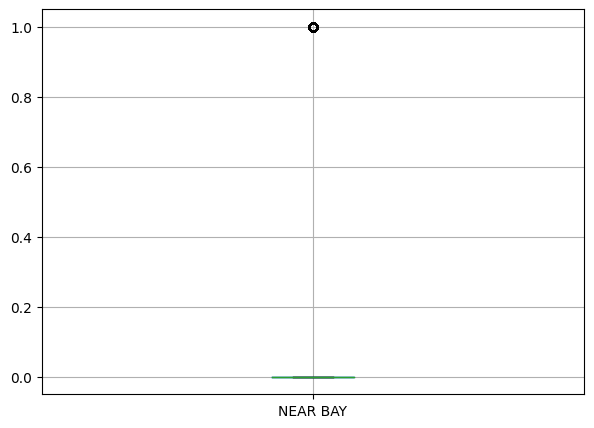

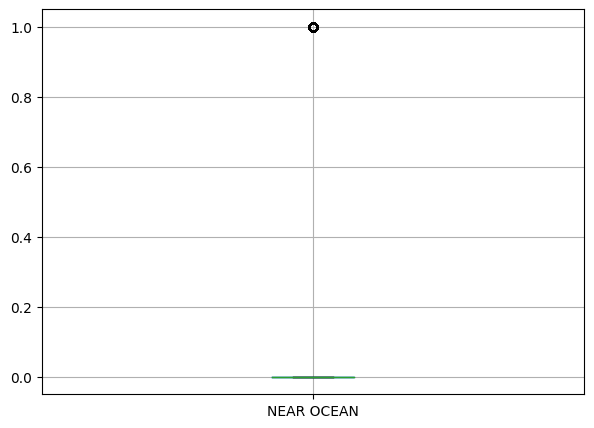

In [11]:
# Making boxplots to check for outliers
for column in df_housingCali_OPNumeric.columns:
    plt.figure(figsize = (7, 5))
    df_housingCali_OPNumeric.boxplot(column = column)

 It seems that there are many instances that fall outside the range defined by **Q3 + 1.5 × IQR** (the top limit of the box) but are smoothly close to the upper whisker, with only a couple of instances that are notably higher (2 instances in 'total_rooms', 'total_bedrooms' and 'population', and 1 instance in 'households').

 It's possible that the higher values are valid observations, especially if they represent blocks with exceptionally large numbers of rooms and bedrooms, which would also justify larger numbers of people living there. Large apartment complexes or hotels may have a higher number of rooms, while properties in densely populated areas may have more bedrooms. There could then be plausible explanations for such high observations.

We may consider transforming the data to reduce skewness and the impact of outliers.
    
    
# Logarithm transformation

Overall, **logarithm transformation** is a versatile technique that can be applied effectively to a wide range of positively skewed or highly skewed data distributions, helping to address skewness, improve data distributional properties, and enhance the performance of statistical analyses and modeling tasks.

Tranforming the data this way preserves the order and relationships between data values while transforming the scale. This makes the transformed data easier to interpret and analyze compared to other transformations that may alter the relative differences between values.
Logarithm transformation compresses the range of values in the dataset. For positively skewed (right skewed) data where the majority of values are concentrated towards the lower end of the distribution and there are a few extremely high values, taking the logarithm of the data effectively "pulls in" the high values towards the center of the distribution. This compression helps to spread out the data and reduce the disparity between extreme values and the rest of the data, making it more symmetrical and closer to a normal (Gaussian) distribution, which is desirable for many statistical techniques and machine learning algorithms that assume or perform better with normally distributed data. Additionally, logarithm transformation helps stabilize the variance of the data, which can as well improve the performance of certain statistical tests and modeling techniques.

The minimum value that the 4 features we want to transform ('total_rooms', 'total_bedrooms', 'population' and 'households') can have is zero (no negative numbers), and since zero is a possible value we have to be careful when applying the logarithm. Adding 1 before applying the logarithm transformation can be useful when dealing with data that contain zero values, as the logarithm of zero is undefined. By adding 1, you ensure that the transformation is well-defined and avoid issues with zero values.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

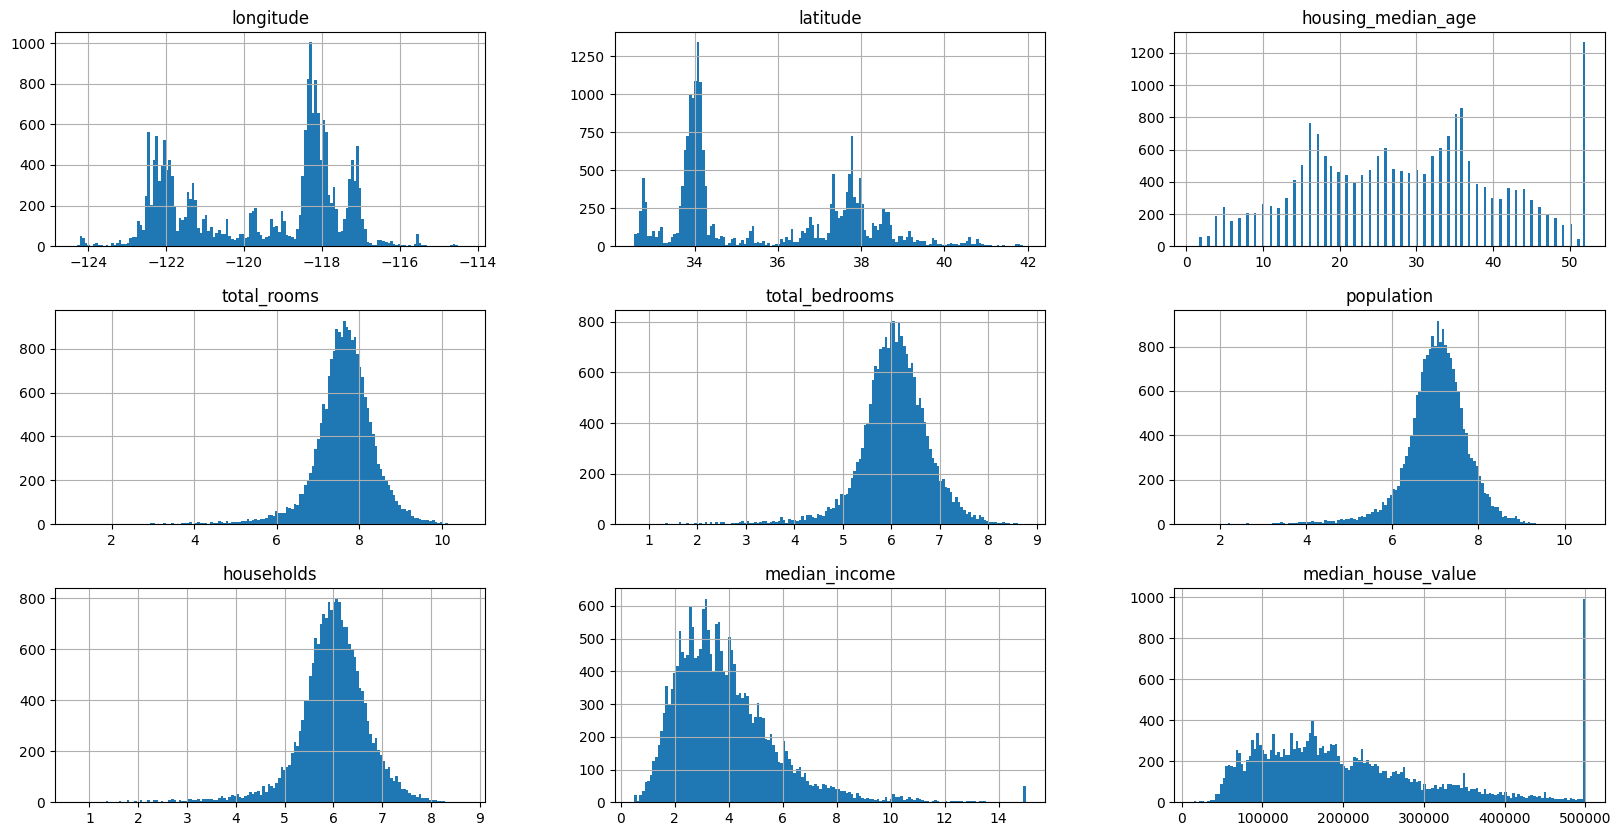

In [12]:
# Creating a new dataset containing the logarithm of each right skewed feature
df_housingCali_Transformed = df_housingCali_OPNumeric.copy()

df_housingCali_Transformed['total_rooms'] = np.log(df_housingCali_Transformed['total_rooms'] + 1)  # adding 1 to avoid log(0) = undefined
df_housingCali_Transformed['total_bedrooms'] = np.log(df_housingCali_Transformed['total_bedrooms'] + 1)
df_housingCali_Transformed['population'] = np.log(df_housingCali_Transformed['population'] + 1)
df_housingCali_Transformed['households'] = np.log(df_housingCali_Transformed['households'] + 1)

df_housingCali_Transformed.hist(bins = 150, figsize = (20, 10))
# Boolean values are typically not suitable for histograms (they display the distribution of numerical data only)

# **Data Visualization**

Since we have the latitudes and longitudes of the blocks in the dataset, we could plot the positions of each block and classify each position by its median house value.
We could do this with a scatterplot.

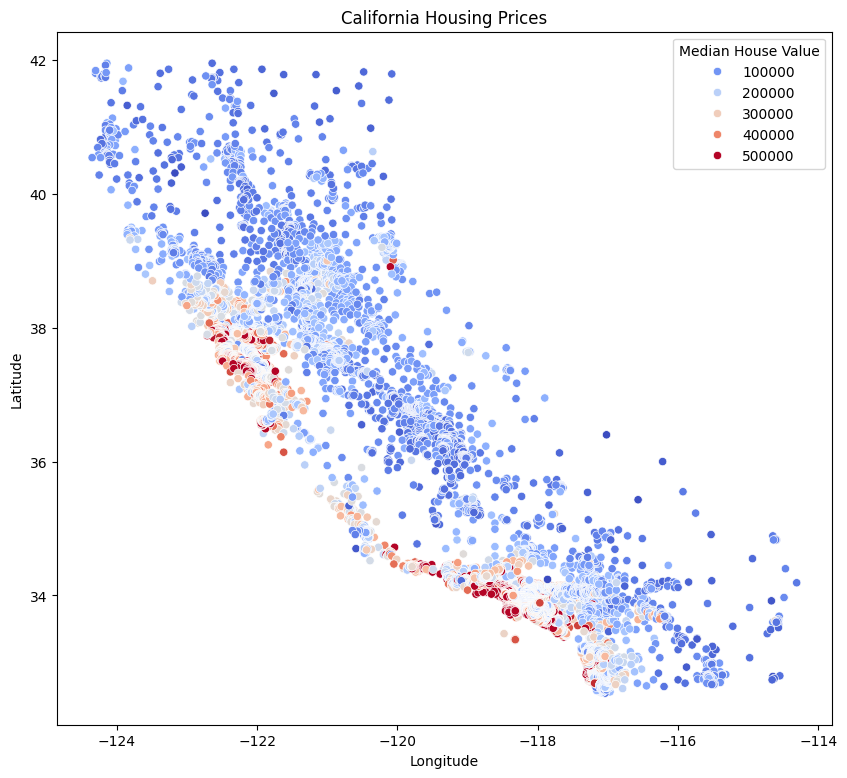

In [13]:
# Creating a house value scatterplot (using Seaborn)
plt.figure(figsize = (10, 9))
sns.scatterplot(data = df_housingCali_Transformed, x = 'longitude', y = 'latitude', hue = 'median_house_value', palette = 'coolwarm')

plt.title('California Housing Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title = 'Median House Value')
plt.show()

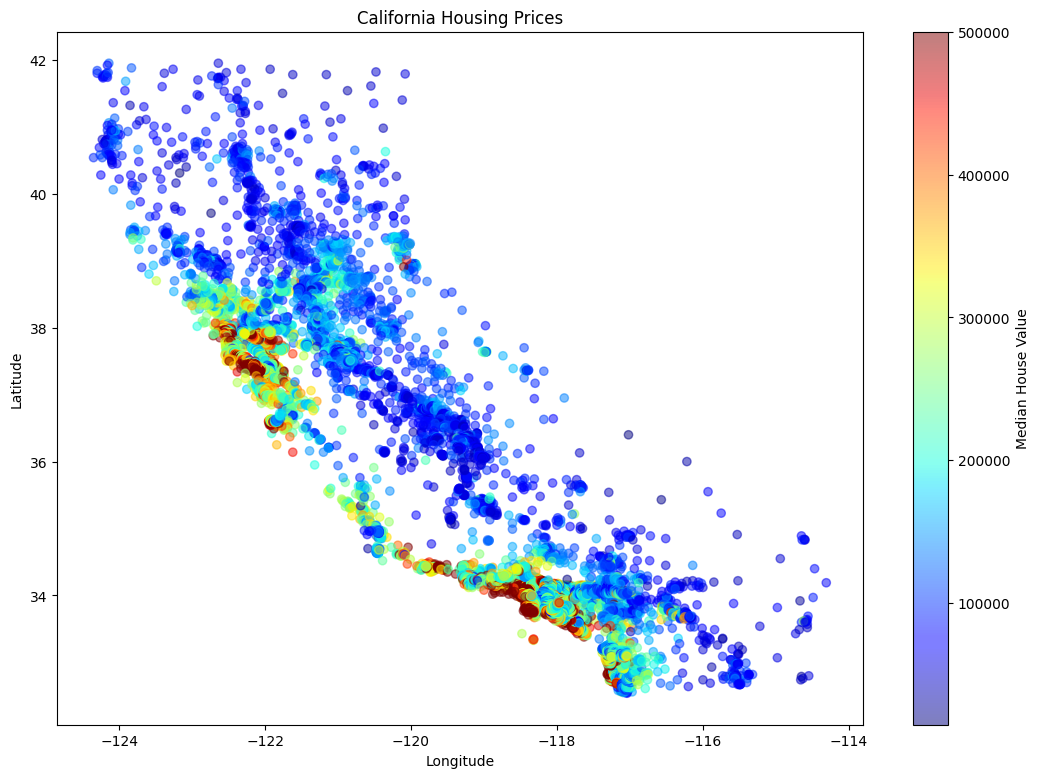

In [14]:
# Creating an alternative house value scatterplot (using only MatplotLib)
plt.figure(figsize = (13, 9))
plt.scatter(x = df_housingCali_Transformed['longitude'], y = df_housingCali_Transformed['latitude'], c = df_housingCali_Transformed['median_house_value'], cmap = 'jet', alpha = 0.5)

plt.colorbar(label = 'Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices')
plt.show()

# Some important insights
From these scatterplots we easily figure out that in fact it seams like blocks near the ocean tend to be more expensive. This observation aligns with our previous analysis that suggested a negative correlation between living inland (far from the ocean) and median house values.
However, the relationship between house values and ocean proximity does not seem to be uniform across the entire coastline. Larger cities or areas with more amenities and economic opportunities (like Sacramento, Los Angeles or San Diego) tend to have higher house values than other cities.

Another aspect than could be explained by this plot is the negative correlation between the latitude and the house value. We have already seen that further analysis would be needed to understand the underlying reasons for this correlation (other than latutude in itself). The distribution of population across California is definitely one of those reasons, since larger cities and urban areas with higher population densities and more economic activity are often located in the southern regions of California (such as San Diego and Los Angeles), contributing to higher property prices in those areas. Climate is probably an important factor as well, for southern regions of California typically experience warmer temperatures, milder winters, and less precipitation compared to the cooler conditions (especially during winter) found in Northern California cities like San Francisco or Oakland.

Visualizing data through plots can often provide deeper insights and help confirm or refine conclusions drawn from previous analyses.
This scatterplot of median house values across California allows us to visually explore the spatial distribution of property values relative to geographic features.

This helps us gain a more intuitive understanding of the underlying factors influencing housing prices in different regions.


# **Feature Engineering**

This process involves creating new features from existing data to gain better insights from the data or to improve the performance of machine learning models.
We have actually done some feature engineering already. Encoding categorical columns (like One-Hot Encoding) and applying transformations to columns (such as the Logarithmic Transformation) are some common techniques used in feature engineering.
Other techniques, such as: combining existing features through mathematical operations, in order to capture interactions between variables (called Interaction), grouping numerical values into categories based on certain criteria (also known as Discretization), or scaling numerical features to a similar range to prevent one feature from dominating others during model training (Feature Scaling, like Standardization, using z-score, or Min-Max scaling).


In this dataset all features are of interest by themselves, but we could create an interaction term between the number of rooms and the number of bedrooms in order to know how many of the rooms in a block are bedrooms, for example.

Interaction terms would be important here for us to get new features that could be of use when we build our model later.

With our housing dataset, we can create interaction terms between the number of rooms and the median income to capture how the affordability of a property might be influenced by both its size and the income level (joint influence) of potential buyers. Similarly, we could create interaction terms between geographic features like latitude and longitude to capture how location-specific factors may affect housing prices differently in different areas.

We may as well deternime, on average, how many rooms are available per household in a block, which can provide insights into the living conditions or housing density. For that we may create an interaction term between the number of rooms and the number of households.

Let us create interaction terms between the number of rooms and the number of bedrooms and between the number of rooms and the number of households.



In [15]:
# Creating interaction terms (new features) out of original features
df_housingCali_WithNewFeats = df_housingCali_Transformed.copy()

df_housingCali_WithNewFeats['BedroomsPerRoom'] = df_housingCali_WithNewFeats['total_bedrooms'] / df_housingCali_WithNewFeats['total_rooms']
df_housingCali_WithNewFeats['RoomsPerHousehold'] = df_housingCali_WithNewFeats['total_rooms'] / df_housingCali_WithNewFeats['households']

df_housingCali_WithNewFeats

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,BedroomsPerRoom,RoomsPerHousehold
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,False,False,False,True,False,0.717813,1.399834
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,False,False,False,True,False,0.790429,1.260013
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,False,False,False,True,False,0.720313,1.407171
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,False,False,False,True,False,0.764097,1.325768
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,False,False,False,True,False,0.762444,1.329892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,False,True,False,False,False,0.798973,1.278530
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,False,True,False,False,False,0.766205,1.380045
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,False,True,False,False,False,0.801228,1.271340
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,False,True,False,False,False,0.799078,1.285243


We just created two new features for our dataset which could be important for our understanding of the housing characteristics and potentially be two more features that help us predicting housing prices more accurately.

The first term could help answer the question "On average, how many bedrooms are there for each room?".
This ratio could provide insights into the composition of the households in terms of the distribution of bedrooms relative to the total number of rooms. For example, a higher ratio may indicate that households tend to have more bedrooms relative to the total number of rooms, suggesting a higher density of bedrooms or smaller living areas.

Similarly, understanding the average number of rooms per household can provide valuable insights into the housing characteristics of different areas. Higher values of "RoomsPerHousehold" may indicate larger or more spacious homes, which could be associated with higher housing prices due to increased demand for such properties. Conversely, lower values may suggest more crowded living conditions or smaller homes, which could influence housing prices differently.

By including these features in the analysis, we can capture variations in housing density, living space, and overall quality, which can be important factors influencing housing prices. Therefore, incorporating them into the predictive models may potentially improve their accuracy by accounting for these nuanced housing characteristics.

We can create a new correlation matrix involving these new features, to see how they correlated with our target.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'BedroomsPerRoom'}>,
        <Axes: title={'center': 'RoomsPerHousehold'}>, <Axes: >]],
      dtype=object)

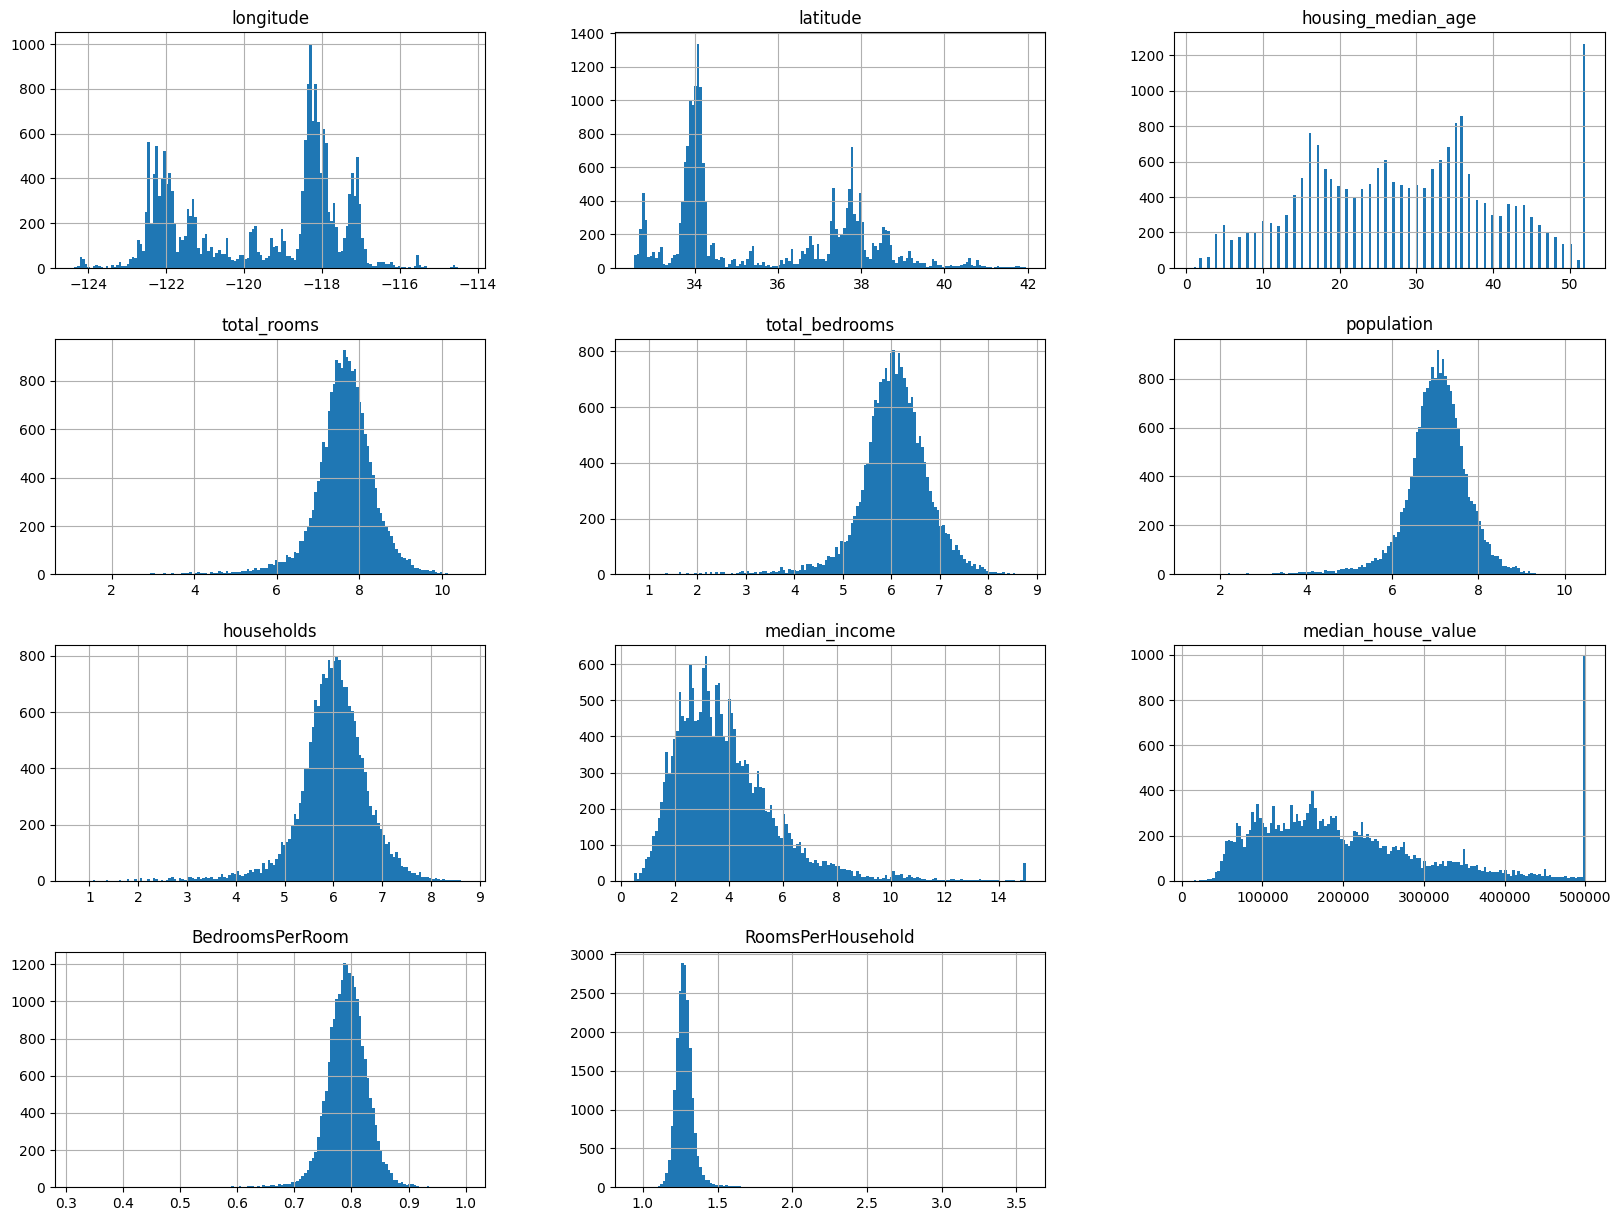

In [16]:
# Checking the new distributions
df_housingCali_WithNewFeats.hist(bins = 150, figsize = (20, 15))

Having the 'BedroomsPerRoom' and 'RoomsPerHousehold' features exhibit approximately normal (Gaussian) distributions is a positive sign. It indicates that these engineered features are behaving in a way that aligns with expectations, making them potentially more informative for analysis and modeling.

In [17]:
# Creating a new correlation matrix
new_CorrMatrix = df_housingCali_WithNewFeats.corr()
new_CorrMatrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,BedroomsPerRoom,RoomsPerHousehold
longitude,1.000000,-0.924616,-0.109357,0.029967,0.060817,0.109259,0.055823,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185,0.097555,-0.067385
latitude,-0.924616,1.000000,0.011899,-0.032552,-0.068248,-0.136543,-0.088207,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342,-0.113840,0.140709
housing_median_age,-0.109357,0.011899,1.000000,-0.313918,-0.272112,-0.243011,-0.241630,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797,-0.034734,-0.037070
total_rooms,0.029967,-0.032552,-0.313918,1.000000,0.945865,0.864580,0.931700,0.205800,0.158506,0.020809,-0.012862,-0.007567,-0.016499,0.002862,0.413025,-0.370189
total_bedrooms,0.060817,-0.068248,-0.272112,0.945865,1.000000,0.897523,0.974593,-0.025575,0.053311,0.041725,-0.044914,-0.001902,-0.016793,0.016429,0.676798,-0.544786
population,0.109259,-0.136543,-0.243011,0.864580,0.897523,1.000000,0.932190,-0.004850,-0.021904,0.115020,-0.071775,-0.012866,-0.059377,-0.014457,0.576463,-0.617203
households,0.055823,-0.088207,-0.241630,0.931700,0.974593,0.932190,1.000000,0.003918,0.072765,0.072391,-0.087137,-0.009222,-0.005827,0.019715,0.637891,-0.649592
median_income,-0.015550,-0.079626,-0.118278,0.205800,-0.025575,-0.004850,0.003918,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351,-0.511493,0.333041
median_house_value,-0.045398,-0.144638,0.106432,0.158506,0.053311,-0.021904,0.072765,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378,-0.198690,0.114094
<1H OCEAN,0.320831,-0.446928,0.045553,0.020809,0.041725,0.115020,0.072391,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018,0.076262,-0.129906


<Axes: >

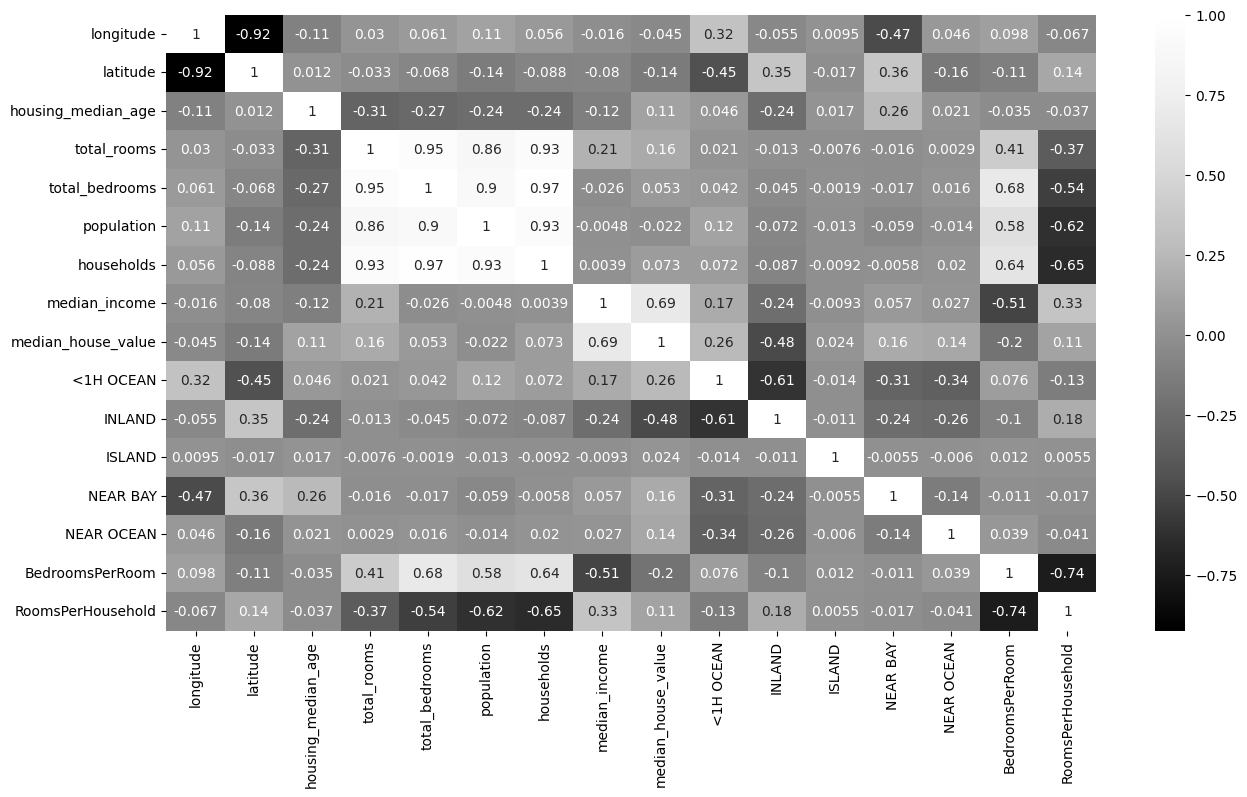

In [18]:
# Visualing the new matrix as a heatmap (from Seaborn)
plt.figure(figsize = (15,8))
sns.heatmap(new_CorrMatrix, annot = True, cmap = 'Greys_r')

The correlation between the new variables, BedroomsPerRoom and RoomsPerHousehold, and the target variable, median_house_value, is as follows:

- **BedroomsPerRoom** (-0.206744): There is a negative correlation between the ratio of bedrooms to rooms in a block and the median house value. This implies that blocks with a higher proportion of bedrooms relative to the total number of rooms tend to have lower median values. This could indicate that properties with more bedrooms compared to the total number of rooms are less desirable or located in areas with lower housing prices;

- **RoomsPerHousehold** (0.117988): There is a positive correlation between the ratio of rooms to households and the median house value. This suggests that houses with more rooms per household tend to have higher median values. This might imply that larger households or properties with more rooms are generally more valuable and desirable.

The correlations between the new variables and the target variable, 'median_house_value', are not very strong. However, even moderate correlations can still provide valuable insights into the relationships between different features and the target variable. While stronger correlations may indicate more influential factors, moderate correlations can still help inform decision-making and field understanding.

Also, it is important to notice that even though the correlation between 'total_rooms' and the target, and also between 'total_bedrooms' and the target are not very significant, the correlation between 'BedroomsPerRoom' and the target is actually more significant than both. This suggests that the new feature 'BedroomsPerRoom', which represents the ratio of bedrooms to total rooms in a block, may capture certain aspects of the data that are more relevant to predicting the target variable (median_house_value) than the total number of rooms or bedrooms alone. A similar situation happens with 'RoomsPerHousehold' when we compare to 'total_rooms' or 'households' and their correlations with the target.

This underscores the importance of feature engineering and selecting relevant features that capture meaningful patterns in the data for predictive modeling.

# Conclusion (of Part 1)

Based on the exploratory data analysis and feature engineering conducted, it appears that the dataset has been adequately prepared for modeling. Here are some key conclusions:

- **Data Understanding**: We gained insights into the dataset's structure, distributions, and correlations between features. This understanding is crucial for making informed decisions during the modeling process;

- **Data Cleaning**: We handled missing values and ensured that the dataset is clean and ready for analysis. Although we removed a small portion of the data due to missing values, it should not significantly impact the modeling process given the dataset's size;

- **Feature Engineering**: We created new features, such as BedroomsPerRoom and RoomsPerHousehold, which may capture additional information relevant to predicting median house values. These features offer insights into the housing composition and density within each geographical block;

- **Correlation Analysis**: We examined the correlations between features and the target variable (median_house_value). While some correlations were moderate, others were weaker. However, the new features showed promising correlations with the target, indicating their potential usefulness in modeling;

- **Insights for Modeling**: The dataset provides a comprehensive set of features that can be utilized for modeling median house values. Additionally, the insights gained from exploratory data analysis and feature engineering will inform the selection of appropriate modeling techniques and the interpretation of model results.

Overall, the dataset is well-prepared for modeling, and the insights obtained during the data analysis process will guide further steps in developing predictive models for median house values in California.

We are then ready to export the 'df_housingCali_WithNewFeats' DataFrame. Then we will be able to import it in a new file to use it for modeling (Part 2).

In [19]:
# Checking our current working directory
import os
os.getcwd()

'/content'

Since this project is made using Colab, the current directory is typically '/content'. We can save the modified DataFrame as a CSV file in this directory.

In [20]:
# Exporting the well-prepared DataFrame to a CSV file
df_housingCali_WithNewFeats.to_csv('housing_data_with_new_features.csv', index = False)

This concludes Part 1 of the project